# G2M insight for Cab Investment

## 1. Business problem
The main purpose of the project is to determine the investment opportunity in cab business. Go-to-market (G2M) strategies predict the potential challenges by identifying the target market, clarifying the value proposition, defining the pricing strategy etc.

## 2. Area of investigation
1. How was the profit change against time?
1. How was the demand of the cab business?
1. How was the profits in different cities?
1. How was the customer loyalty rates?
1. How was the demand varies according to age, income, gender and cities?
1. Which payment method was more popular among age, income, gender and cities?

## 3. Data Understanding and Preparation 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta

In [2]:
cab = pd.read_csv('./Datasets/Cab_data.csv')
city = pd.read_csv('./Datasets/City.csv')
customer = pd.read_csv('./Datasets/Customer_ID.csv')
transaction = pd.read_csv('./Datasets/Transaction_ID.csv')

### 3.1 Cab dataset

In [3]:
print(f"Shape of the Cab dataset: {cab.shape}")
print(f"Data Types of the data:\n{cab.dtypes}")
cab.head()

Shape of the Cab dataset: (359392, 7)
Data Types of the data:
Transaction ID      int64
Date of Travel      int64
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


The `Date of Travel` column is not in a correct datatype

In [4]:
# convert the date
def to_date(n):
    date_str = (datetime(1899, 12, 30) + timedelta(days= float(n))).strftime("%Y-%m-%d")
    date = datetime.strptime(date_str, "%Y-%m-%d")
    return date

cab['Date of Travel'] = cab['Date of Travel'].apply(lambda x: to_date(x))
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [5]:
# sort with date
cab = cab.sort_values(by = 'Date of Travel') \
    .reset_index(drop= True)

In [6]:
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640
1,10000640,2016-01-02,Yellow Cab,CHICAGO IL,15.60,374.66,209.6640
2,10000635,2016-01-02,Yellow Cab,CHICAGO IL,25.08,532.83,337.0752
3,10001001,2016-01-02,Yellow Cab,NEW YORK NY,46.80,1391.91,595.2960
4,10000171,2016-01-02,Pink Cab,SAN DIEGO CA,14.28,269.15,147.0840


In [7]:
round(cab.describe(), 2)

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,359392.00,359392,359392.00,359392.00,359392.00
mean,10220761.19,2017-08-17 01:37:55.042294016,22.57,423.44,286.19
min,10000011.00,2016-01-02 00:00:00,1.90,15.60,19.00
25%,10110809.75,2016-11-23 00:00:00,12.00,206.44,151.20
50%,10221035.50,2017-09-10 00:00:00,22.44,386.36,282.48
75%,10330937.25,2018-05-12 00:00:00,32.96,583.66,413.68
max,10440107.00,2018-12-31 00:00:00,48.00,2048.03,691.20
std,126805.80,NaN,12.23,274.38,157.99


### 3.2 City dataset

In [8]:
print(f"Shape of the City datasets: {city.shape}")
print(f"Data types of the city datasets:\n{city.dtypes}")

Shape of the City datasets: (20, 3)
Data types of the city datasets:
City          object
Population    object
Users         object
dtype: object


The data type of Population and Users isn't correct and the ',' between the number could be removed

In [9]:
city['Population'] = [x.replace(',', '') for x in city['Population']]
city['Users'] = [x.replace(',','') for x in city['Users']]
city['Population'] = city['Population'].astype(float)
city['Users'] = city['Users'].astype(float)
city.dtypes

City           object
Population    float64
Users         float64
dtype: object

In [10]:
city.head(20)

,City,Population,Users
0,NEW YORK NY,8405837.0,302149.0
1,CHICAGO IL,1955130.0,164468.0
2,LOS ANGELES CA,1595037.0,144132.0
3,MIAMI FL,1339155.0,17675.0
4,SILICON VALLEY,1177609.0,27247.0
5,ORANGE COUNTY,1030185.0,12994.0
6,SAN DIEGO CA,959307.0,69995.0
7,PHOENIX AZ,943999.0,6133.0
8,DALLAS TX,942908.0,22157.0
9,ATLANTA GA,814885.0,24701.0


### 3.3 Customer dataset

In [11]:
print(f"Shape of the customer dataset: {customer.shape}")
print(f"Data type of the dataset\n{customer.dtypes}")


Shape of the customer dataset: (49171, 4)
Data type of the dataset
Customer ID            int64
Gender                object
Age                    int64
Income (USD/Month)     int64
dtype: object


In [12]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


The data types in customer id dataset are correct

### 3.4 Transaction id dataset

In [13]:
print(f"Shape of the transaction id dataset: {transaction.shape}")
print(f"Data type of the transaction id dataset:\n{transaction.dtypes}")

Shape of the transaction id dataset: (440098, 3)
Data type of the transaction id dataset:
Transaction ID     int64
Customer ID        int64
Payment_Mode      object
dtype: object


The data type in transaction id dataset are correct.

### 3.5 Merge all the dataset to one dataset

In [14]:
df = cab.merge(transaction, on='Transaction ID').merge(customer, on='Customer ID').merge(city, on='City')
print(f"Shape of the merged dataset: {df.shape}")
print(f"Data Type of the merged dataset:\n{df.dtypes}")

Shape of the merged dataset: (359392, 14)
Data Type of the merged dataset:
Transaction ID                 int64
Date of Travel        datetime64[ns]
Company                       object
City                          object
KM Travelled                 float64
Price Charged                float64
Cost of Trip                 float64
Customer ID                    int64
Payment_Mode                  object
Gender                        object
Age                            int64
Income (USD/Month)             int64
Population                   float64
Users                        float64
dtype: object


Rename the columns

In [15]:
df.columns = [col.replace(' ', '_') for col in df.columns]
df = df.rename(columns = {'Income_(USD/Month)': 'Income'})

In [16]:
df.head()

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Payment_Mode,Gender,Age,Income,Population,Users
0,10001340,2016-01-02,Yellow Cab,WASHINGTON DC,10.20,202.54,135.8640,52536,Card,Male,24,10606,418859.0,127001.0
1,10020018,2016-03-26,Yellow Cab,WASHINGTON DC,5.94,88.50,74.1312,52536,Cash,Male,24,10606,418859.0,127001.0
2,10102932,2016-11-09,Pink Cab,WASHINGTON DC,15.21,179.33,153.6210,52536,Cash,Male,24,10606,418859.0,127001.0
3,10164725,2017-04-17,Yellow Cab,WASHINGTON DC,8.08,123.21,104.7168,52536,Card,Male,24,10606,418859.0,127001.0
4,10188478,2017-06-24,Yellow Cab,WASHINGTON DC,13.80,283.74,168.9120,52536,Cash,Male,24,10606,418859.0,127001.0


### 3.6 Check Missing Values

In [17]:
df.apply(lambda x: sum(x.isnull()), axis=0)

Transaction_ID    0
Date_of_Travel    0
Company           0
City              0
KM_Travelled      0
Price_Charged     0
Cost_of_Trip      0
Customer_ID       0
Payment_Mode      0
Gender            0
Age               0
Income            0
Population        0
Users             0
dtype: int64

No missing value was found

### 3.7 Check Duplicate rows

In [18]:
duplicated_rows = df[df.drop('Transaction_ID', axis=1).duplicated()]
print('The number of duplicated rows', duplicated_rows.shape[0])

The number of duplicated rows 0


No duplicated row was found

### 3.8 Check Data Types

In [19]:
print(f"The data Types of the merged datasets:\n{df.dtypes}")

The data Types of the merged datasets:
Transaction_ID             int64
Date_of_Travel    datetime64[ns]
Company                   object
City                      object
KM_Travelled             float64
Price_Charged            float64
Cost_of_Trip             float64
Customer_ID                int64
Payment_Mode              object
Gender                    object
Age                        int64
Income                     int64
Population               float64
Users                    float64
dtype: object


In [20]:
df['Income'] = df['Income'].astype(float)
df['Population'] = df['Population'].astype('int64')
df['Users'] = df['Users'].astype('int64')

In [21]:
print(f"The data Types of the merged datasets:\n{df.dtypes}")

The data Types of the merged datasets:
Transaction_ID             int64
Date_of_Travel    datetime64[ns]
Company                   object
City                      object
KM_Travelled             float64
Price_Charged            float64
Cost_of_Trip             float64
Customer_ID                int64
Payment_Mode              object
Gender                    object
Age                        int64
Income                   float64
Population                 int64
Users                      int64
dtype: object


## 4.  Exploratory Data Analysis

### 4.1 Descriptive Analysis

In [22]:
round(df.describe(),2)

,Transaction_ID,Date_of_Travel,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Age,Income,Population,Users
count,359392.00,359392,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00,359392.00
mean,10220761.19,2017-08-17 01:37:55.042293760,22.57,423.44,286.19,19191.65,35.34,15048.82,3132198.04,158365.58
min,10000011.00,2016-01-02 00:00:00,1.90,15.60,19.00,1.00,18.00,2000.00,248968.00,3643.00
25%,10110809.75,2016-11-23 00:00:00,12.00,206.44,151.20,2705.00,25.00,8424.00,671238.00,80021.00
50%,10221035.50,2017-09-10 00:00:00,22.44,386.36,282.48,7459.00,33.00,14685.00,1595037.00,144132.00
75%,10330937.25,2018-05-12 00:00:00,32.96,583.66,413.68,36078.00,42.00,21035.00,8405837.00,302149.00
max,10440107.00,2018-12-31 00:00:00,48.00,2048.03,691.20,60000.00,65.00,35000.00,8405837.00,302149.00
std,126805.80,NaN,12.23,274.38,157.99,21012.41,12.59,7969.41,3315194.39,100850.05


### 4.2 Features Analysis

Use histogram to visualise the data with more than 2 options and countplot for 2 options

In [23]:
df.nunique()

Transaction_ID    359392
Date_of_Travel      1095
Company                2
City                  19
KM_Travelled         874
Price_Charged      99176
Cost_of_Trip       16291
Customer_ID        46148
Payment_Mode           2
Gender                 2
Age                   48
Income             22725
Population            19
Users                 19
dtype: int64

#### 4.2.1 Date of Travel

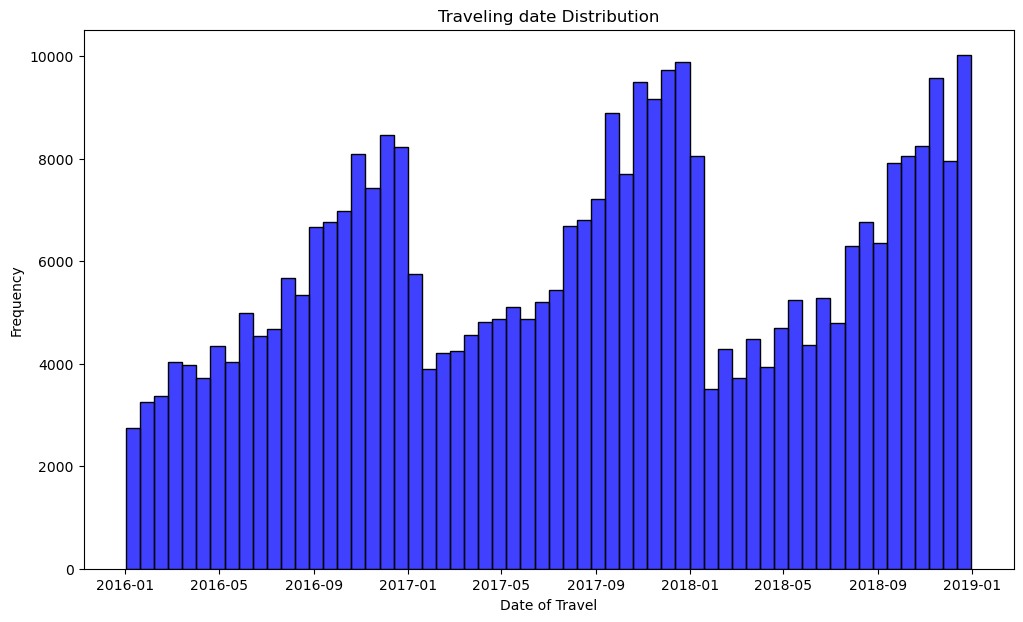

In [24]:
plt.figure(figsize=(12, 7))
ax = sns.histplot(data= df, x="Date_of_Travel", bins= 60, color = 'b')
plt.title("Traveling date Distribution")
plt.ylabel('Frequency')
plt.xlabel('Date of Travel')
plt.show()

#### 4.2.2 KM Travelled

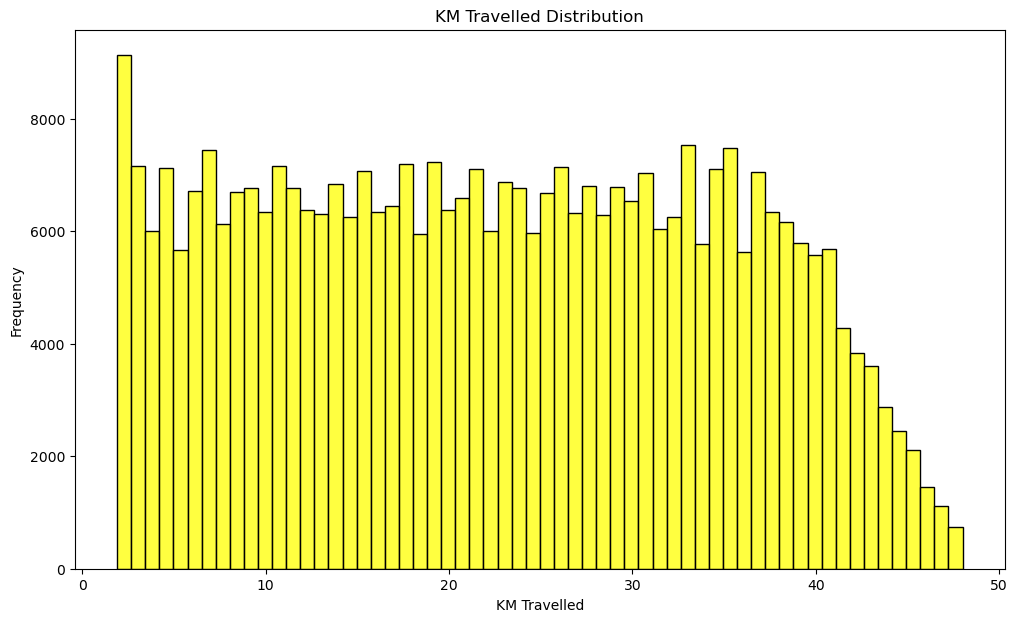

In [25]:
plt.figure(figsize=(12, 7))
ax = sns.histplot(data= df, x="KM_Travelled", bins= 60, color = 'yellow')
plt.title("KM Travelled Distribution")
plt.ylabel('Frequency')
plt.xlabel('KM Travelled')
plt.show()

#### 4.2.3 Charged price

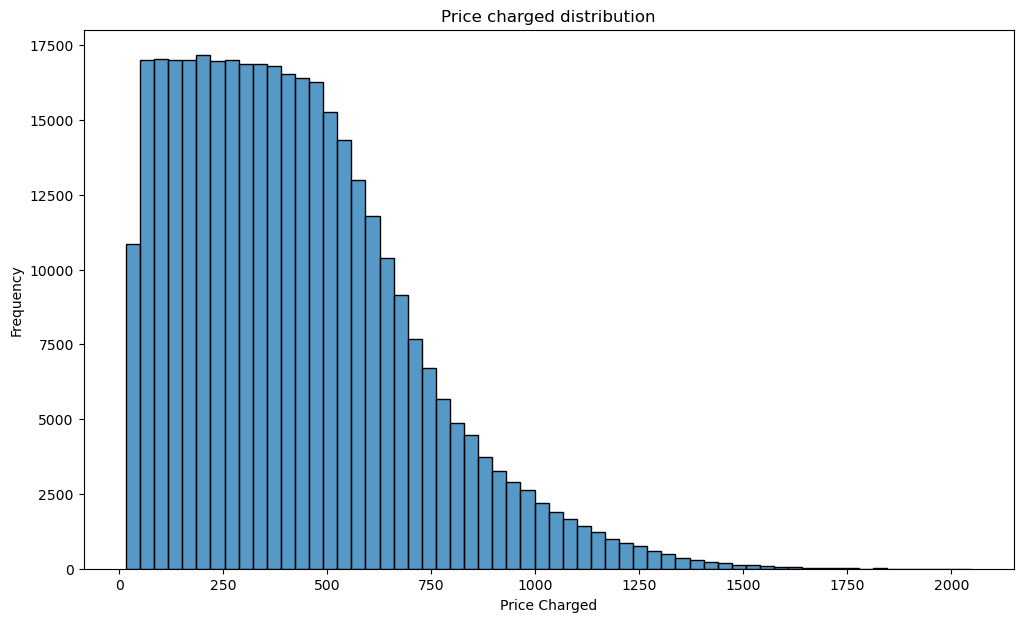

In [26]:
plt.figure(figsize=(12, 7))
ax = sns.histplot(data = df, x = "Price_Charged", bins= 60)
plt.title("Price charged distribution")
plt.xlabel('Price Charged')
plt.ylabel('Frequency')
plt.show()

#### 4.2.4 Cost of the Trip

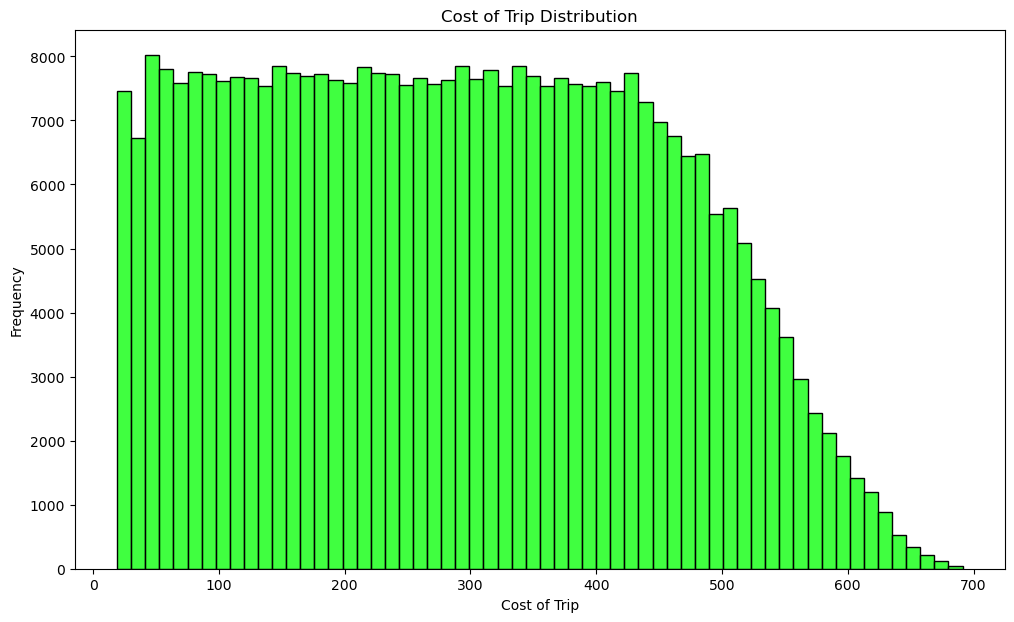

In [27]:
plt.figure(figsize = (12,7))
ax = sns.histplot(data= df, x = "Cost_of_Trip", bins= 60, color = 'lime')
plt.title("Cost of Trip Distribution")
plt.xlabel("Cost of Trip")
plt.ylabel("Frequency")
plt.show()

#### 4.2.5 Payment method

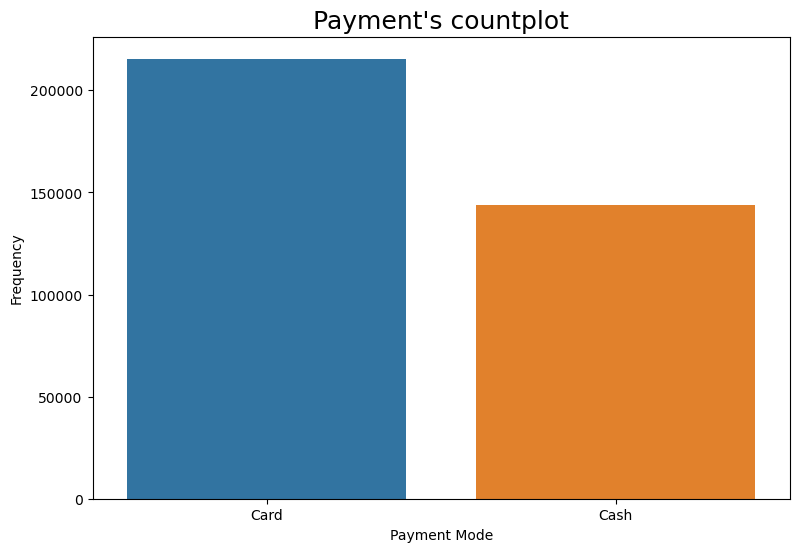

In [28]:
plt.figure(figsize=(9,6))
sns.countplot(data= df, x="Payment_Mode")
plt.title("Payment's countplot", fontsize=18)
plt.ylabel('Frequency')
plt.xlabel('Payment Mode')
plt.show()

#### 4.2.6 Gender

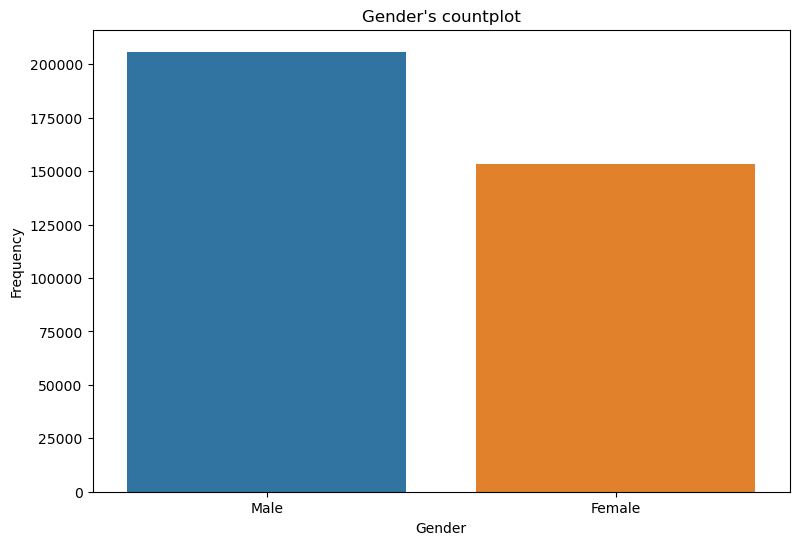

In [29]:
plt.figure(figsize=(9, 6))
sns.countplot(data = df, x= "Gender")
plt.title("Gender's countplot")
plt.xlabel('Gender')
plt.ylabel("Frequency")
plt.show()

#### 4.2.7 Age

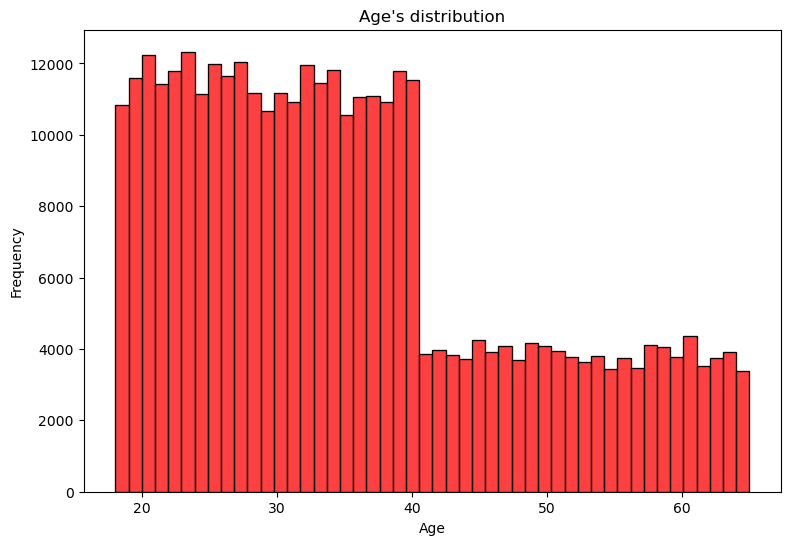

In [30]:
plt.figure(figsize=(9,6))
sns.histplot(data= df, x='Age', bins= 48, color = 'red')
plt.title("Age's distribution")
plt.xlabel('Age')
plt.ylabel("Frequency")
plt.show()

### 4.3 Features relationship

#### 4.3.1 Correlation

In [31]:
df_corr = df.corr(numeric_only=True)
df_corr

,Transaction_ID,KM_Travelled,Price_Charged,Cost_of_Trip,Customer_ID,Age,Income,Population,Users
Transaction_ID,1.000000,-0.001429,-0.052902,-0.003462,-0.016912,-0.001267,-0.001570,0.023868,0.013526
KM_Travelled,-0.001429,1.000000,0.835753,0.981848,0.000389,-0.000369,-0.000544,-0.002311,-0.000428
Price_Charged,-0.052902,0.835753,1.000000,0.859812,-0.177324,-0.003084,0.003228,0.326589,0.281061
Cost_of_Trip,-0.003462,0.981848,0.859812,1.000000,0.003077,-0.000189,-0.000633,0.015108,0.023628
Customer_ID,-0.016912,0.000389,-0.177324,0.003077,1.000000,-0.004735,-0.013608,-0.647052,-0.610742
Age,-0.001267,-0.000369,-0.003084,-0.000189,-0.004735,1.000000,0.003907,-0.009002,-0.005906
Income,-0.001570,-0.000544,0.003228,-0.000633,-0.013608,0.003907,1.000000,0.011868,0.010464
Population,0.023868,-0.002311,0.326589,0.015108,-0.647052,-0.009002,0.011868,1.000000,0.915490
Users,0.013526,-0.000428,0.281061,0.023628,-0.610742,-0.005906,0.010464,0.915490,1.000000


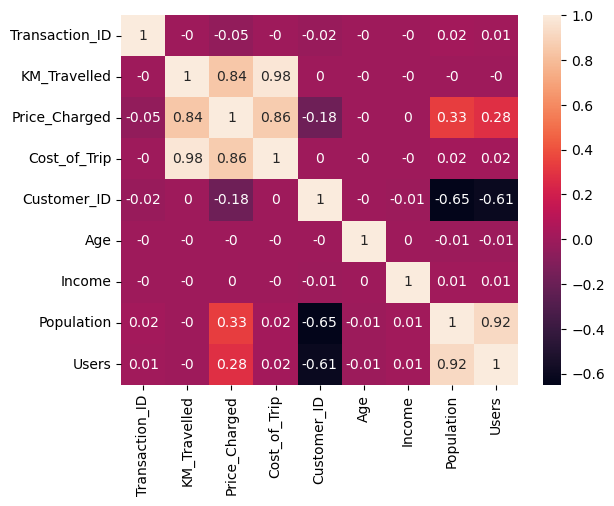

In [32]:
sns.heatmap(round(df_corr, 2), annot=True)
plt.show()

Population has linear relationship with the number of users.

The distance travelled, `KM_Travelled`, has some relationship with the price charged, `Price_Charged`, which makes sense.

#### 4.3.2 Check outliers

From descriptive analysis, we saw that the `Price_Charged` and `Income` have rather high standard derivation. We use boxplot to illustrate if there were outliers in the both columns.

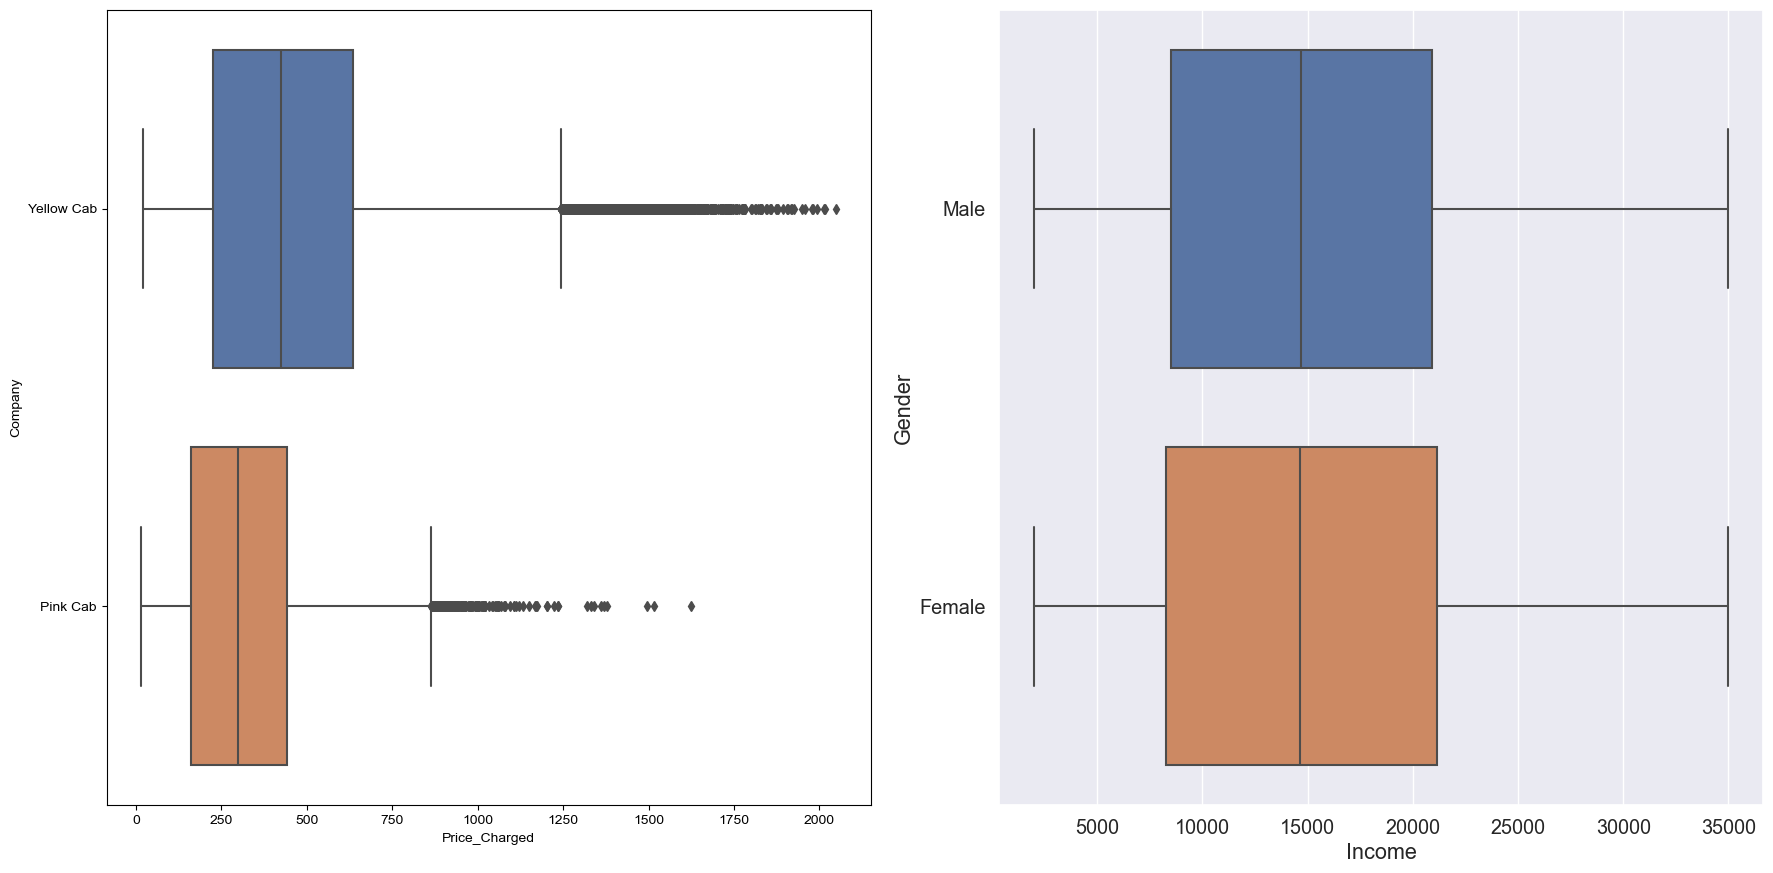

In [33]:
plt.figure(figsize=(18,9))
plt.subplot(1, 2, 1)
sns.set(font_scale=1.3)
sns.boxplot(data = df, y = "Company", x= "Price_Charged", dodge=False)

plt.subplot(1, 2, 2)
sns.set(font_scale=1.3)
sns.boxplot(data= df, y= "Gender", x= "Income", dodge=False)

plt.tight_layout()

Outliers are present in the `Price_Charged` feature. However, we do not have any information for the price charged. So, it was not treated as outliers.

### 4.4 Feature Transformation
Create `Profits` column to store the profits for each trip.

In [34]:
df['Profits'] = df.Price_Charged - df.Cost_of_Trip

In [35]:
df = df.set_index('Date_of_Travel')

## 5. Data Visualisation
Now, we 've finished the data cleansing and the feature engineering. Next, we would like to investigate the cleaned dataset and return some insights

### 5.1 Area of investigation 1: Profit analysis

#### Annual Profit

In [36]:
annual_profit = df.groupby(['Company']) \
                .resample('Y') \
                .Profits\
                .sum() \
                .to_frame('Profits')

annual_profit
                

Profits
Company    Date_of_Travel              
Pink Cab   2016-12-31      1.713511e+06
           2017-12-31      2.033655e+06
           2018-12-31      1.560162e+06
Yellow Cab 2016-12-31      1.392700e+07
           2017-12-31      1.657598e+07
           2018-12-31      1.351740e+07

In [37]:
annual_profit['%Profits'] = annual_profit['Profits'].pct_change() *100


Text(0.5, 0, 'Years')

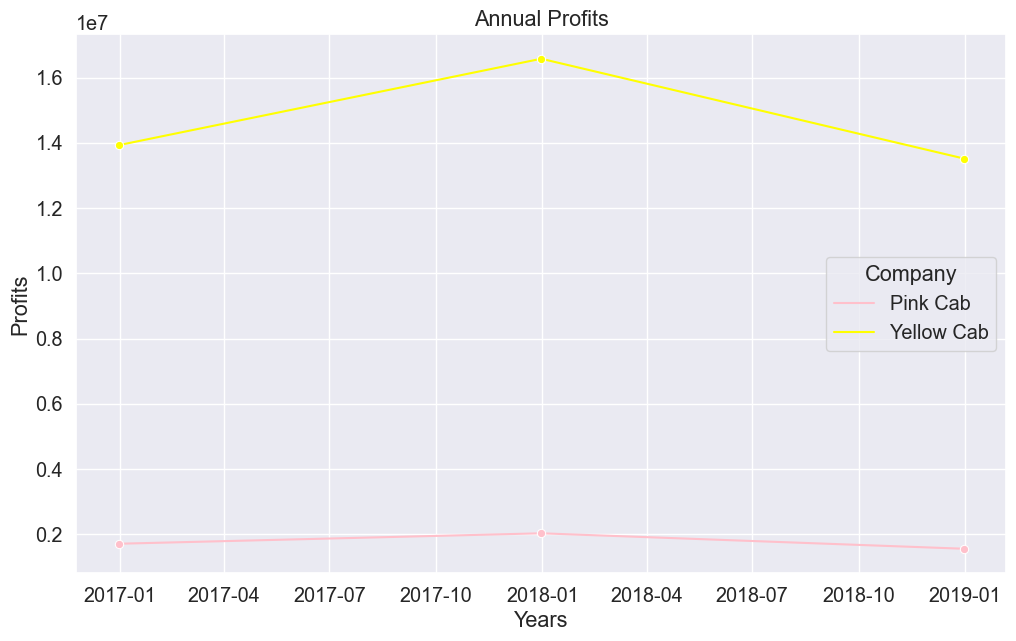

In [38]:
plt.figure(figsize = (12, 7))
ax = sns.lineplot(x = 'Date_of_Travel', 
                  y = 'Profits',
                  hue = 'Company', 
                  data = annual_profit, 
                  palette = ['pink', 'yellow'],
                  marker = 'o')
ax.set_title("Annual Profits")
ax.set_xlabel("Years")

#### Monthly Profits

In [39]:
monthly_profits = df.groupby(['Company']) \
                    .resample('m') \
                    .Profits \
                    .sum() \
                    .to_frame('Profits')

In [40]:
monthly_profits

Profits
Company    Date_of_Travel              
Pink Cab   2016-01-31      7.395286e+04
           2016-02-29      8.747554e+04
           2016-03-31      8.780118e+04
           2016-04-30      8.259185e+04
           2016-05-31      6.155096e+04
...                                 ...
Yellow Cab 2018-08-31      8.869987e+05
           2018-09-30      1.218804e+06
           2018-10-31      1.273756e+06
           2018-11-30      1.416933e+06
           2018-12-31      1.566886e+06

[72 rows x 1 columns]

Text(0.5, 0, 'Months')

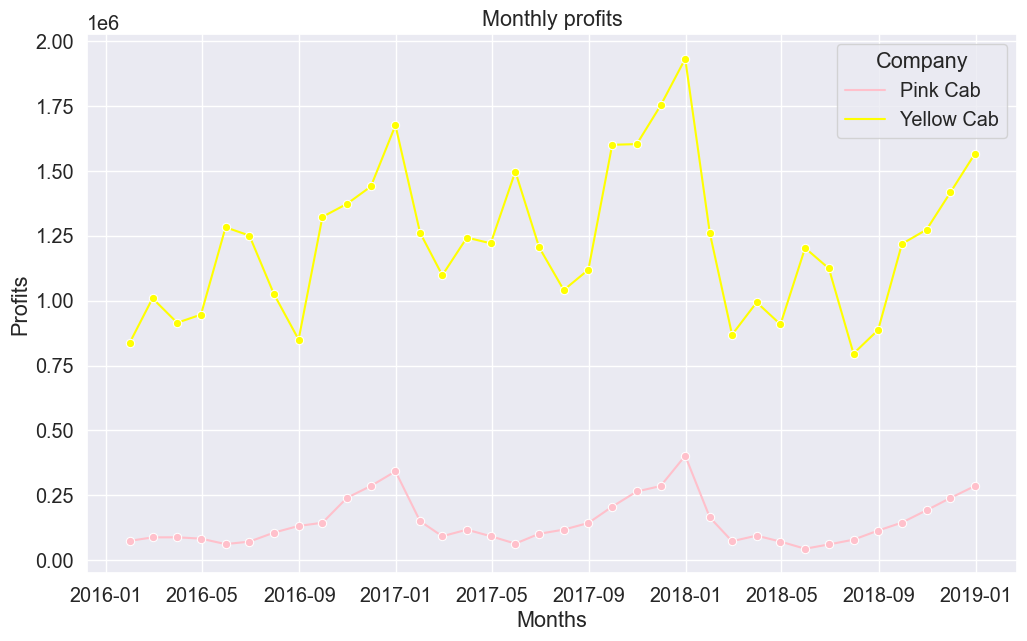

In [41]:
plt.figure(figsize=(12,7))
ax = sns.lineplot(x = 'Date_of_Travel',
                 y = 'Profits',
                 hue = 'Company',
                 data = monthly_profits,
                 palette = ['pink', 'yellow'],
                 marker = 'o')
ax.set_title("Monthly profits")
ax.set_xlabel("Months")

#### Average profits per rides

In [42]:
profits_per_ride = df.groupby(['Company'])\
                    .Profits \
                    .agg(['sum', 'count'])

In [43]:
profits_per_ride

,sum,count
Company,,
Pink Cab,5.307328e+06,84711
Yellow Cab,4.402037e+07,274681


In [44]:
profits_per_ride['Average_profits_per_rides'] = profits_per_ride['sum'] / profits_per_ride['count']
profits_per_ride = profits_per_ride.rename(columns = {'sum': 'Total_profits', 'count': 'Total_rides'})
profits_per_ride

,Total_profits,Total_rides,Average_profits_per_rides
Company,,,
Pink Cab,5.307328e+06,84711,62.652174
Yellow Cab,4.402037e+07,274681,160.259986


Average profits per rides:

Pink Cab: 62.65 USD

Yellow Cab: 160.26 USD

In [45]:
# Average profits per ride (annually)
annual_ppr = df.groupby(['Company'])\
                .resample('Y') \
                .Profits \
                .agg(['sum', 'count'])

In [46]:
annual_ppr['Average_profits_per_rides'] = annual_ppr['sum'] / annual_ppr['count']
annual_ppr.rename(columns = {'sum': 'Total_profits', 'count': 'Total_rides'})
annual_ppr

sum  count  Average_profits_per_rides
Company    Date_of_Travel                                                
Pink Cab   2016-12-31      1.713511e+06  25080                  68.321819
           2017-12-31      2.033655e+06  30321                  67.070839
           2018-12-31      1.560162e+06  29310                  53.229689
Yellow Cab 2016-12-31      1.392700e+07  82239                 169.347821
           2017-12-31      1.657598e+07  98189                 168.817057
           2018-12-31      1.351740e+07  94253                 143.416122

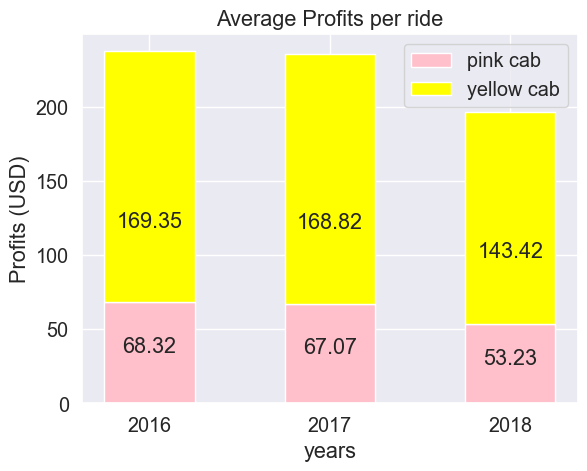

In [60]:
# plot a stacked bar chart

bottom = np.zeros(3)
cabs = {'pink cab': annual_ppr.loc['Pink Cab', 'Average_profits_per_rides'].to_numpy(),
       'yellow cab':annual_ppr.loc['Yellow Cab', 'Average_profits_per_rides'].to_numpy() }
                
width = 0.5

years = ('2016', '2017', '2018')
color = ['pink', 'yellow']

fig, ax = plt.subplots()
for label, cab in cabs.items():
    ax.bar(x = years, 
           height = cab,
           width = width,
           label = label,
           bottom=bottom, 
           color = 'pink' if label == 'pink cab' else 'yellow')
    bottom += cab

    
ax.set_title("Average Profits per ride")
ax.set_xlabel("years")
ax.set_ylabel("Profits (USD)")
# add the number to the stacked bar
pink_lists, yellow_lists = cabs.values()    


for y, pc, yc in zip(years, pink_lists, yellow_lists):
    ax.text(x = y,
           y = pc / 2,
           s = round(pc, 2),
           horizontalalignment='center')
    ax.text(x = y,
           y = (pc + yc) /2,
           s = round(yc, 2),
           horizontalalignment='center')
ax.legend()
plt.show()

#### Average profit per KM

In [48]:
profits_per_km = df.groupby(['Company'])[['KM_Travelled', 'Profits']] \
                    .sum()

profits_per_km['Average_profit_per_km'] = profits_per_km['Profits'] / profits_per_km['KM_Travelled']
profits_per_km

,KM_Travelled,Profits,Average_profit_per_km
Company,,,
Pink Cab,1911073.11,5.307328e+06,2.777146
Yellow Cab,6199417.47,4.402037e+07,7.100727


In [55]:
# average profits per km (annually)
annual_ppk = df.groupby(['Company'])[['KM_Travelled', 'Profits']]\
                    .resample('Y') \
                    .sum() 
    
annual_ppk['Average_profit_per_km'] = annual_ppk['Profits'] / annual_ppk['KM_Travelled']
annual_ppk

KM_Travelled       Profits  Average_profit_per_km
Company    Date_of_Travel                                                   
Pink Cab   2016-12-31         563509.67  1.713511e+06               3.040784
           2017-12-31         685823.52  2.033655e+06               2.965274
           2018-12-31         661739.92  1.560162e+06               2.357667
Yellow Cab 2016-12-31        1859978.21  1.392700e+07               7.487720
           2017-12-31        2214879.02  1.657598e+07               7.483920
           2018-12-31        2124560.24  1.351740e+07               6.362446

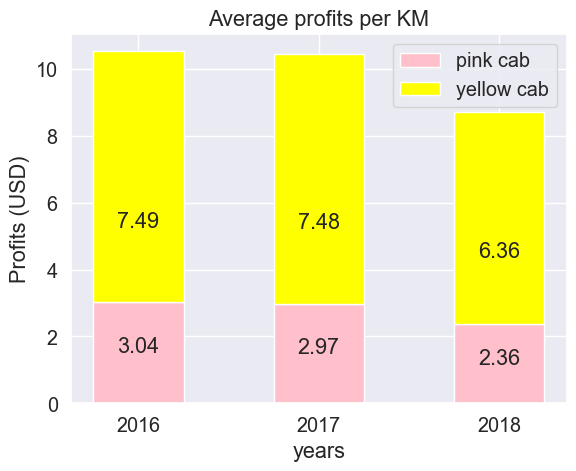

In [61]:
# plot a stacked bar chart
WIDTH = 0.5
years = ('2016', '2017', '2018')
cabs = {'pink cab': annual_ppk.loc['Pink Cab', 'Average_profit_per_km'].to_numpy(),
       'yellow cab': annual_ppk.loc['Yellow Cab', 'Average_profit_per_km'].to_numpy()}
bottom = np.zeros([3])

fig, ax = plt.subplots()

for label, cab in cabs.items():
    ax.bar(x = years,
          height = cab,
          width = WIDTH,
          bottom = bottom,
          label = label,
          color = 'pink' if label == 'pink cab' else 'yellow')
    bottom += cab
    

# add title and axes labels
ax.set_title("Average profits per KM")
ax.set_xlabel("years")
ax.set_ylabel("Profits (USD)")
# add the annotation
pink_lists, yellow_lists = cabs.values()
for y, pc, yc in zip(years, pink_lists, yellow_lists):
    ax.text(x = y,
           y = pc / 2,
           s = round(pc, 2),
           horizontalalignment = 'center')
    ax.text(x = y,
           y = (pc + yc) / 2,
           s = round(yc, 2),
           horizontalalignment = 'center')

ax.legend()
plt.show()

#### Average profits per city

In [65]:
profits_per_city = df.groupby(['Company', 'City']) \
                    .Profits \
                    .sum() \
                    .to_frame()
profits_per_city

Profits
Company    City                        
Pink Cab   ATLANTA GA      9.605008e+04
           AUSTIN TX       1.474453e+05
           BOSTON MA       2.620017e+05
           CHICAGO IL      3.187225e+05
           DALLAS TX       2.473011e+04
           DENVER CO       4.058494e+04
           LOS ANGELES CA  1.125732e+06
           MIAMI FL        1.623012e+05
           NASHVILLE TN    6.428453e+04
           NEW YORK NY     1.511474e+06
           ORANGE COUNTY   1.019958e+05
           PHOENIX AZ      3.559639e+04
           PITTSBURGH PA   1.710774e+04
           SACRAMENTO CA   5.532401e+04
           SAN DIEGO CA    6.378898e+05
           SEATTLE WA      1.127813e+05
           SILICON VALLEY  3.402505e+05
           TUCSON AZ       5.928957e+04
           WASHINGTON DC   1.937664e+05
Yellow Cab ATLANTA GA      7.463828e+05
           AUSTIN TX       3.792557e+05
           BOSTON MA       1.506718e+06
           CHICAGO IL      3.068591e+06
           DALLAS TX       1.104003e+06
           DENVER CO       3.570001e+05
           LOS ANGELES CA  3.285977e+06
           MIAMI FL        5.960001e+05
           NASHVILLE TN    8.524768e+04
           NEW YORK NY     2.645108e+07
           ORANGE COUNTY   3.550060e+05
           PHOENIX AZ      1.573445e+05
           PITTSBURGH PA   6.805822e+04
           SACRAMENTO CA   6.200218e+04
           SAN DIEGO CA    9.492737e+05
           SEATTLE WA      4.919035e+05
           SILICON VALLEY  9.764547e+05
           TUCSON AZ       8.097112e+04
           WASHINGTON DC   3.299104e+06

In [84]:
# plot a stacked bar chart
cities = df.City.unique()
cabs = {'pink cab': profits_per_city.loc['Pink Cab', 'Profits'].to_numpy(),
       'yellow cab': profits_per_city.loc['Yellow Cab', 'Profits'].to_numpy()}

bottom = np.zeros(len(cities))

fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(cities))

multiplier = 0
width = 0.25

for label, cab in cabs.items():
    offset = width * multiplier
    ax.bar(x = x + offset,
          height = cab,
           width = width,
          label = label,
          bottom = bottom,
          color = 'pink' if label == 'pink cab' else 'yellow')
    multiplier += 1
#     bottom += cab
    
# add title and axes label
ax.set_xticks(x + width, cities)
ax.set_title("Average profit per city")
ax.set_xlabel("Cities")
ax.set_ylabel("Profits (USD)")
ax.tick_params(axis='x', labelrotation = 90)
# add annotation
pink_lists, yellow_lists = cabs.values()
for c, pc, yc in zip(cities, pink_lists, yellow_lists):
    ax.text(x = c,
           y = pc / 2,
           s = round(pc, 2),
           horizontalalignment =  'center',
           rotation = 90)
    ax.text(x = c,
           y = (pc + yc) /2,
           s = round(yc, 2),
           horizontalalignment = 'center', 
           rotation = 90)

ax.legend()
plt.show()

ConversionError: Failed to convert value(s) to axis units: 'WASHINGTON DC'

<Figure size 1200x700 with 1 Axes>

In [62]:
df.columns

Index(['Transaction_ID', 'Company', 'City', 'KM_Travelled', 'Price_Charged',
       'Cost_of_Trip', 'Customer_ID', 'Payment_Mode', 'Gender', 'Age',
       'Income', 'Population', 'Users', 'Profits'],
      dtype='object')

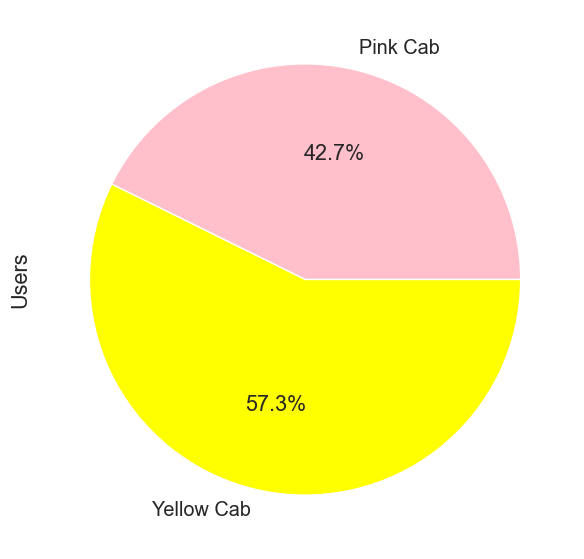

In [49]:
plt.figure(figsize = (12, 7))
df.groupby('Company').Users.mean().plot(kind='pie', autopct='%1.1f%%', colors = ['pink', 'yellow'])
plt.show()